In [2]:
# Import Lib
import sys
print('Python Version : {}'.format(sys.version))
import pandas as pd
print('Pandas Version : {}'.format(pd.__version__))
import numpy as np
print('Numpy Version : {}'.format(np.__version__))
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir("C:\\Users\\S719789\\Desktop\\Data Science\\Random Learnings\\Kaggle\\Titanic\\Learning-1")

from sklearn.preprocessing import LabelEncoder # Converting categorical var into numeric
from sklearn.model_selection import train_test_split # Train test split
from sklearn.model_selection import cross_val_score # Cross validation

from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.linear_model import Perceptron # Perceptron
from sklearn.svm import SVC # Support Vector Machines
from sklearn.svm import LinearSVC # Linear SVC
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier
from sklearn.neighbors import KNeighborsClassifier # # KNN or k-Nearest Neighbors
from xgboost import XGBClassifier  # XGB
from sklearn.grid_search import GridSearchCV # For GridSearch

from sklearn.metrics import accuracy_score  # To evaluate the Algorithms
from sklearn.externals import joblib  # To save the model

Python Version : 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Pandas Version : 0.20.1
Numpy Version : 1.14.5


In [4]:
# Load the Training dataset. I am not loading test dataset. From Training i am segregating random 50 records for testing
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Understandings about Training dataset
train.describe()
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# check if its balanced data (or) not
train['Survived'].value_counts(normalize = True)
# its almost 60/40 so no need of SMOTE ( SMOTE generally its > 85%)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
np.random.seed(10)
stage=train.sample(50)
stage.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S


In [8]:
# train , stage : new train will contain records excluding those in stage
# reference : https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
train = train.loc[~train['PassengerId'].isin(stage['PassengerId'])]

# Write train , stage to dir
train.to_csv('train_1.csv',index=False)
stage.to_csv('stage_1.csv',index=False)

In [9]:
# Missing value df for train
tot_null=train.isnull().sum().sort_values(ascending=False)
tol_null_percentage=(((train.isnull().sum()/len(train))*100).sort_values(ascending=False))
missing_df_train=pd.concat([tot_null,round(tol_null_percentage,2)],axis=1,keys=['tot_null','%'])
missing_df_train['total'] = len(train)
missing_df_train

,tot_null,%,total
Cabin,649,77.17,841
Age,168,19.98,841
Embarked,2,0.24,841
Fare,0,0.00,841
Ticket,0,0.00,841
Parch,0,0.00,841
SibSp,0,0.00,841
Sex,0,0.00,841
Name,0,0.00,841
Pclass,0,0.00,841


In [10]:
# Missing value df for stage
tot_null=stage.isnull().sum().sort_values(ascending=False)
tol_null_percentage=(((stage.isnull().sum()/len(stage))*100).sort_values(ascending=False))
missing_df_stage=pd.concat([tot_null,round(tol_null_percentage,2)],axis=1,keys=['tot_null','%'])
missing_df_stage['total'] = len(stage)
missing_df_stage

,tot_null,%,total
Cabin,38,76.0,50
Age,9,18.0,50
Embarked,0,0.0,50
Fare,0,0.0,50
Ticket,0,0.0,50
Parch,0,0.0,50
SibSp,0,0.0,50
Sex,0,0.0,50
Name,0,0.0,50
Pclass,0,0.0,50


In [11]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
stage["CabinBool"] = (stage["Cabin"].notnull().astype('int'))
#calculate percentages of train CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
# Another way : train['Survived'].groupby(train['CabinBool']).mean()[1]
print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
# Another way : train['Survived'].groupby(train['CabinBool']).mean()[0]

# we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
stage = stage.drop(['Cabin'], axis = 1)

#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
stage = stage.drop(['Ticket'], axis = 1)

Percentage of CabinBool = 1 who survived: 67.70833333333334
Percentage of CabinBool = 0 who survived: 30.508474576271187


In [14]:
# Missing value updates
#complete missing age with median
train['Age'].fillna(train['Age'].median(), inplace = True)
stage['Age'].fillna(stage['Age'].median(), inplace = True)
#complete embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
stage['Embarked'].fillna(stage['Embarked'].mode()[0], inplace = True)

In [15]:
# Recheck Missing value df for train
tot_null=train.isnull().sum().sort_values(ascending=False)
tol_null_percentage=(((train.isnull().sum()/len(train))*100).sort_values(ascending=False))
missing_df_train=pd.concat([tot_null,round(tol_null_percentage,2)],axis=1,keys=['tot_null','%'])
missing_df_train['total'] = len(train)
missing_df_train

,tot_null,%,total
CabinBool,0,0.0,841
Embarked,0,0.0,841
Fare,0,0.0,841
Parch,0,0.0,841
SibSp,0,0.0,841
Age,0,0.0,841
Sex,0,0.0,841
Name,0,0.0,841
Pclass,0,0.0,841
Survived,0,0.0,841


In [19]:
#create a combined group of both datasets
combine = [train, stage]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(train['Title'].value_counts())
print(pd.crosstab(train['Title'], train['Sex']))

#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
stage = stage.drop(['Name'], axis = 1)

Mr          483
Miss        174
Mrs         120
Master       37
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Lady          1
Don           1
Jonkheer      1
Sir           1
Mme           1
Countess      1
Ms            1
Name: Title, dtype: int64
Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    37
Miss         174     0
Mlle           2     0
Mme            1     0
Mr             0   483
Mrs          120     0
Ms             1     0
Rev            0     6
Sir            0     1
    Title  Survived
0  Master  0.594595
1    Miss  0.706215
2      Mr  0.161491
3     Mrs  0.785124
4    Rare  0.285714
5   Royal  1.000000


In [20]:
# Age groups
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
stage['AgeGroup'] = pd.cut(stage["Age"], bins, labels = labels)
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
182,183,0,3,male,9.00,4,2,31.3875,S,0,Master,Child
224,225,1,1,male,38.00,1,0,90.0000,S,1,Mr,Adult
32,33,1,3,female,28.00,0,0,7.7500,Q,0,Miss,Young Adult
755,756,1,2,male,0.67,1,1,14.5000,S,0,Master,Baby
44,45,1,3,female,19.00,0,0,7.8792,Q,0,Miss,Student


In [23]:
# Fare  groups 
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
stage['FareBand'] = pd.qcut(stage['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
stage = stage.drop(['Fare'], axis = 1)

In [24]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
682,683,0,3,male,20.0,0,0,S,0,Mr,Student,2
330,331,1,3,female,28.0,2,0,Q,0,Miss,Young Adult,3
208,209,1,3,female,16.0,0,0,Q,0,Miss,Teenager,1
777,778,1,3,female,5.0,0,0,S,0,Miss,Baby,2
4,5,0,3,male,35.0,0,0,S,0,Mr,Young Adult,2


In [25]:
# Family size, isAlone
combine = [train, stage]
for dataset in combine:
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1]= 0

# drop SibSp, Parch
train = train.drop(['SibSp'], axis = 1)
stage = stage.drop(['SibSp'], axis = 1)

train = train.drop(['Parch'], axis = 1)
stage = stage.drop(['Parch'], axis = 1)

In [26]:
#train['Survived'].groupby(train['IsAlone']).mean()
train["Survived"][train["IsAlone"] == 1].value_counts(normalize=True)

0    0.687008
1    0.312992
Name: Survived, dtype: float64

In [27]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,IsAlone
384,385,0,3,male,28.0,S,0,Mr,Young Adult,1,1,1
290,291,1,1,female,26.0,S,0,Miss,Young Adult,4,1,1
703,704,0,3,male,25.0,Q,0,Mr,Young Adult,1,1,1
411,412,0,3,male,28.0,Q,0,Mr,Young Adult,1,1,1
672,673,0,2,male,70.0,S,0,Mr,Senior,2,1,1


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    841 non-null int64
Survived       841 non-null int64
Pclass         841 non-null int64
Sex            841 non-null object
Age            841 non-null float64
Embarked       841 non-null object
CabinBool      841 non-null int32
Title          841 non-null object
AgeGroup       841 non-null category
FareBand       841 non-null category
FamilySize     841 non-null int64
IsAlone        841 non-null int64
dtypes: category(2), float64(1), int32(1), int64(5), object(3)
memory usage: 111.2+ KB


In [29]:
'''
# Problem here is STAGE and TRAIN different
# Embarked, AgeGroup, FareBand - Non numerical features (object,category) - Need to convert them into numerical
FareBand = LabelEncoder()
AgeGroup = LabelEncoder()
Embarked = LabelEncoder()
train["FareBand_1"] = FareBand.fit_transform(train["FareBand"])
train["AgeGroup_1"] = FareBand.fit_transform(train["AgeGroup"])
train["Embarked_1"] = FareBand.fit_transform(train["Embarked"])

stage["FareBand_1"] = FareBand.fit_transform(stage["FareBand"])
stage["AgeGroup_1"] = FareBand.fit_transform(stage["AgeGroup"])
stage["Embarked_1"] = FareBand.fit_transform(stage["Embarked"])
'''

In [30]:
#train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,IsAlone,FareBand_1,AgeGroup_1,Embarked_1
0,1,0,3,male,22.0,S,0,Mr,Student,1,2,0,0,4,2
2,3,1,3,female,26.0,S,0,Miss,Young Adult,1,1,1,0,6,2
3,4,1,1,female,35.0,S,1,Mrs,Young Adult,4,2,0,3,6,2
4,5,0,3,male,35.0,S,0,Mr,Young Adult,2,1,1,1,6,2
5,6,0,3,male,28.0,Q,0,Mr,Young Adult,2,1,1,1,6,1


In [31]:
#stage.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,IsAlone,FareBand_1,AgeGroup_1,Embarked_1
590,591,0,3,male,35.0,S,0,Mr,Young Adult,1,1,1,0,5,2
131,132,0,3,male,20.0,S,0,Mr,Student,1,1,1,0,3,2
628,629,0,3,male,26.0,S,0,Mr,Young Adult,1,1,1,0,5,2
195,196,1,1,female,58.0,C,1,Miss,Adult,4,1,1,3,0,0
230,231,1,1,female,35.0,S,1,Mrs,Young Adult,4,2,0,3,5,2


In [33]:
# Title,Embarked, AgeGroup, FareBand, Sex - Non numerical features (object,category) - Need to convert them into numerical
combine = [train, stage]
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
sex_mapping = {"male": 0, "female": 1}
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
FareBand = LabelEncoder()  # Trying label encoder
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mapping)
    dataset['AgeGroup'] = dataset['AgeGroup'].fillna(0)
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    dataset['Sex'] = dataset['Sex'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna(0) 
    dataset["FareBand"] = FareBand.fit_transform(dataset["FareBand"])
    

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,IsAlone,FareBand_1,AgeGroup_1,Embarked_1
0,1,0,3,0.0,22.0,0.0,0,0.0,0.0,0,2,0,0,4,2
2,3,1,3,0.0,26.0,0.0,0,0.0,0.0,0,1,1,0,6,2
3,4,1,1,0.0,35.0,0.0,1,0.0,0.0,3,2,0,3,6,2
4,5,0,3,0.0,35.0,0.0,0,0.0,0.0,1,1,1,1,6,2
5,6,0,3,0.0,28.0,0.0,0,0.0,0.0,1,1,1,1,6,1


In [40]:
train=train.drop(['AgeGroup_1','FareBand_1','Embarked_1'],axis=1)
stage=stage.drop(['AgeGroup_1','FareBand_1','Embarked_1'],axis=1)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,IsAlone
0,1,0,3,0.0,22.0,0.0,0,0.0,0.0,0,2,0
2,3,1,3,0.0,26.0,0.0,0,0.0,0.0,0,1,1
3,4,1,1,0.0,35.0,0.0,1,0.0,0.0,3,2,0
4,5,0,3,0.0,35.0,0.0,0,0.0,0.0,1,1,1
5,6,0,3,0.0,28.0,0.0,0,0.0,0.0,1,1,1


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    841 non-null int64
Survived       841 non-null int64
Pclass         841 non-null int64
Sex            841 non-null float64
Age            841 non-null float64
Embarked       841 non-null float64
CabinBool      841 non-null int32
Title          841 non-null float64
AgeGroup       841 non-null float64
FareBand       841 non-null int64
FamilySize     841 non-null int64
IsAlone        841 non-null int64
dtypes: float64(5), int32(1), int64(6)
memory usage: 122.1 KB


In [46]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.10, random_state = 0,stratify=target)
print(X_train.shape) # Training split 756
print(X_test.shape)   # Testing split 85
print(y_train.shape) # Training target
print(y_test.shape)   # Test target

(756, 10)
(85, 10)
(756,)
(85,)


In [49]:
# Spot Check Algorithms
models=[]
models.append(('gaussian',GaussianNB()))
models.append(('logreg',LogisticRegression()))
models.append(('svc',SVC()))
models.append(('linear_svc',LinearSVC()))
models.append(('perceptron',Perceptron()))
models.append(('decisiontree',DecisionTreeClassifier()))
models.append(('randomforest',RandomForestClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('gbk',GradientBoostingClassifier()))
models.append(('xgb',XGBClassifier()))
# evaluate each model in turn
Model=[]
Accuracy=[]
SD=[]
model_score = pd.DataFrame()
for name, model in models:
    gen=model.fit(X_train,y_train)
    scores = cross_val_score(gen, X_train, y_train, cv=10)
    acc=round(scores.mean()*100,2)
    sd=round(scores.std() * 2,2)
    Model.append(name)
    Accuracy.append(acc)
    SD.append(sd)
   # print(' Accuracy of Model - {}      is ::   {}  with SD as {}'.format(name,acc,sd))
Models_Accuracy = pd.DataFrame({'Model' : Model,
                                'Accuracy' : Accuracy,
                                'SD' : SD } )
Models_Accuracy.sort_values(by='Accuracy',ascending=False)

C:\Users\S719789\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\S719789\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\S719789\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\S719789\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\

,Accuracy,Model,SD
9,73.69,xgb,0.11
8,73.55,gbk,0.10
1,73.41,logreg,0.09
2,72.10,svc,0.08
0,71.04,gaussian,0.09
7,70.37,knn,0.10
6,69.86,randomforest,0.11
5,68.91,decisiontree,0.11
4,66.66,perceptron,0.14
3,65.32,linear_svc,0.22


In [66]:
X_train.head()

,Pclass,Sex,Age,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,IsAlone
421,3,0.0,21.0,0.0,0,0.0,0.0,0,1,1
654,3,0.0,18.0,0.0,0,0.0,0.0,0,1,1
473,2,0.0,23.0,0.0,1,0.0,0.0,1,1,1
718,3,0.0,28.0,0.0,0,0.0,0.0,2,1,1
360,3,0.0,40.0,0.0,0,0.0,0.0,2,6,0


In [50]:
## XGB Classifier
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

C:\Users\S719789\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\S719789\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [54]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                             cv_params, 
                             scoring = 'accuracy', cv = 10, n_jobs = -1) 


In [55]:
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [56]:
optimized_GBM.grid_scores_

[mean: 0.71561, std: 0.05088, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.71296, std: 0.04242, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.72619, std: 0.04356, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.70238, std: 0.04540, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.70503, std: 0.04142, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.71958, std: 0.04818, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.69577, std: 0.04899, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.69974, std: 0.04583, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.72090, std: 0.04617, params: {'max_depth': 7, 'min_child_weight': 5}]

In [57]:
xgdmat = xgb.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [58]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [59]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
51,0.265851,0.020791,0.223543,0.009735
52,0.264535,0.019858,0.223543,0.007222
53,0.261886,0.017754,0.222220,0.006684
54,0.260561,0.020049,0.221559,0.007849
55,0.256614,0.015318,0.221891,0.008308


In [60]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 100)

In [61]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

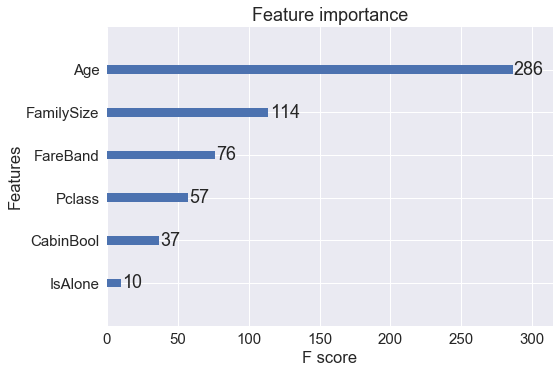

In [63]:
xgb.plot_importance(final_gb)

In [67]:
testdmat = xgb.DMatrix(X_test)

In [68]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.22740252, 0.8376123 , 0.1625865 , 0.20495471, 0.18959294,
       0.22445932, 0.80112094, 0.2149654 , 0.05855167, 0.565339  ,
       0.6393426 , 0.3161172 , 0.16653374, 0.39762044, 0.11832604,
       0.18959294, 0.41976705, 0.77859044, 0.4426052 , 0.18107897,
       0.30598417, 0.12065954, 0.20032342, 0.30598417, 0.45194042,
       0.22740252, 0.42114192, 0.26646638, 0.42359853, 0.6474436 ,
       0.22445932, 0.06334209, 0.8564054 , 0.38089955, 0.6030826 ,
       0.05994573, 0.1436247 , 0.2577508 , 0.2577508 , 0.28288296,
       0.32934847, 0.17483458, 0.2574286 , 0.36484665, 0.725409  ,
       0.5159895 , 0.6240857 , 0.24876277, 0.61839837, 0.8017485 ,
       0.7487799 , 0.31892696, 0.18959294, 0.23279403, 0.10106117,
       0.38116232, 0.6552438 , 0.35476276, 0.2795613 , 0.16653374,
       0.18207215, 0.4141755 , 0.07405826, 0.8626155 , 0.18107897,
       0.11832604, 0.7623032 , 0.04629785, 0.13186242, 0.10106117,
       0.18107897, 0.44359097, 0.2642048 , 0.6740833 , 0.15609

In [69]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [70]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.6470588235294118, 0.3529411764705882)